In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


# Goal: The objective of this coding challenge is to plot and visualize data along with finding any trends. This includes "proving" or rather, showing, that the dataset follows the Hertzsprung-Russell Diagram.

## We start off by looking at the raw data and getting a basic overview of what type of data we're dealing with.
### Throughout the notebook, the code is accompanied with comments and observations with headers highlighing anything important. To start off, we will execute a few basic pandas commands to get a hang of the data.

In [2]:
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv") #opens the csv file
df #prints first and last 5 rows of the file

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
df.describe() #gives us more insight into the data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [4]:
#finding averages
print(df.groupby(['Star type']).mean())

           Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
Star type                                                    
0                 2997.950          0.000693      0.110015   
1                 3283.825          0.005406      0.348145   
2                13931.450          0.002434      0.010728   
3                16018.000      32067.386275      4.430300   
4                15347.850     301816.250000     51.150000   
5                11405.700     309246.525000   1366.897500   

           Absolute magnitude(Mv)  
Star type                          
0                       17.563500  
1                       12.539975  
2                       12.582500  
3                       -0.367425  
4                       -6.369925  
5                       -9.654250  


In [5]:
#we can start by picking a category — star color in our case (the reason i chose star color was that it's one of the two non-numerical columns)
print(df['Star color'].unique()) #prints all the unique star colors there are
print(df['Star color'].nunique()) #prints the number of unique colors

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
19


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


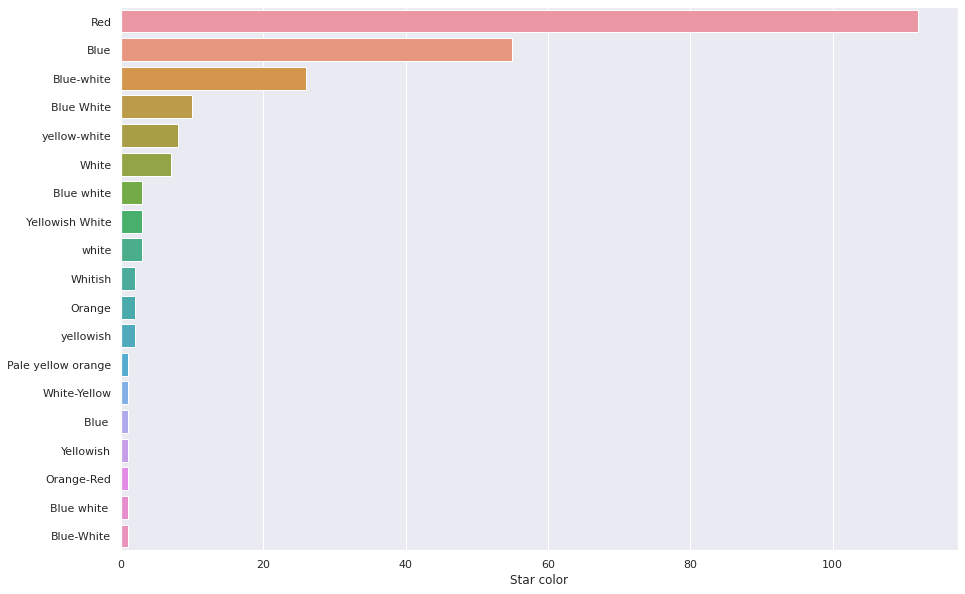

In [6]:
#we can use a bar graph to look at the distribution of each "unique" color
star_col = df['Star color'].value_counts()
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(star_col, star_col.index);

### Upon executing the aforementioned code and looking at the graph, we can see that there are a few duplicates (ex: Blue white, Blue-White, Blue White, and so on), so we can combine the same color with different spelling/verbiage into one.

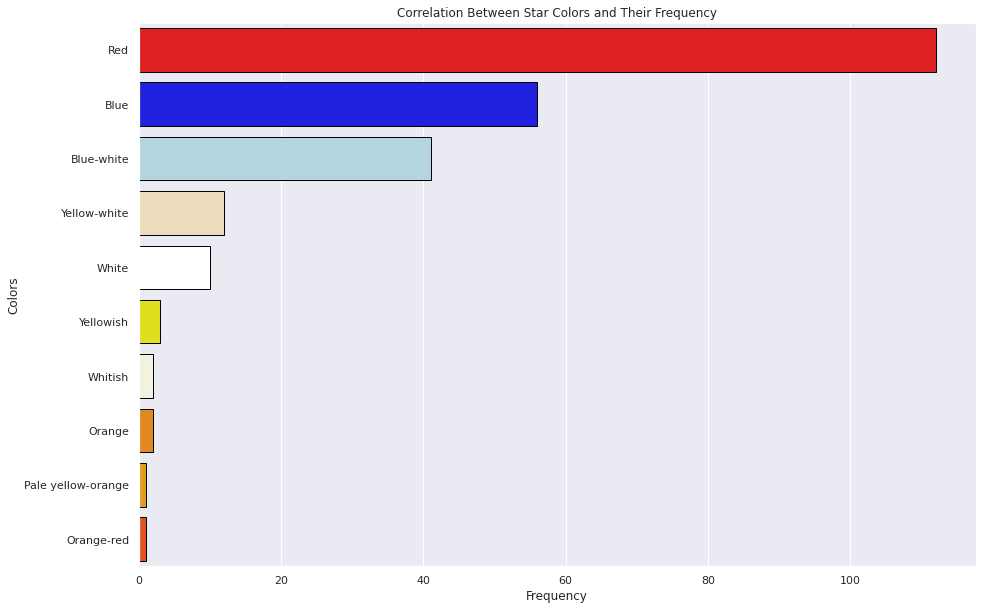

In [7]:
#"fix" the verbiage to have a cohesive nomenclature/naming format
df2 = df.replace({'Star color' : {'Blue White' : 'Blue-white', 'Blue white ' : 'Blue-white', 'Blue-White' : 'Blue-white', 
                                  'Blue white' : 'Blue-white','yellow-white' : 'Yellow-white', 'Yellowish White' : 'Yellow-white', 
                                  'White-Yellow': 'Yellow-white', 'Orange-Red' : 'Orange-red','white' : 'White', 'Blue ' : 'Blue', 
                                  'yellowish' : 'Yellowish', 'Pale yellow orange' : 'Pale yellow-orange'}})
star_color = df2['Star color'].value_counts();
#sns.barplot(star_color, star_color.index);
plt.ylabel('Colors')
plt.xlabel('Frequency')

color = ['red','blue','lightblue','wheat','white','yellow','beige','darkorange', 'orange', 'orangered']
#graph the bar graph with the revised dataFrame
sns.barplot(
     x=star_color.values, y=star_color.index,palette=color,
    linewidth=1, edgecolor='black')
sns.set(rc={'figure.figsize':(15,10)})

plt.title('Correlation Between Star Colors and Their Frequency')
plt.show()

In [8]:
print(df2['Star color'].unique())
print(df2['Star color'].nunique())
#notice that now, we have 10 unique colors, all listed when this section of code is run

['Red' 'Blue-white' 'White' 'Yellow-white' 'Pale yellow-orange' 'Blue'
 'Whitish' 'Orange' 'Yellowish' 'Orange-red']
10


In [9]:
#now that we have defined and revised df into df2, let's look at the frequency of each star type, star color, and spectral class 
#(notice how all three have a non-numerical value, making it easier to group like we have done so in the code below)
print(df2['Star type'].value_counts())
print("\n")
print(df2['Star color'].value_counts())
print("\n")
print(df2['Spectral Class'].value_counts())

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64


Red                   112
Blue                   56
Blue-white             41
Yellow-white           12
White                  10
Yellowish               3
Whitish                 2
Orange                  2
Pale yellow-orange      1
Orange-red              1
Name: Star color, dtype: int64


M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64


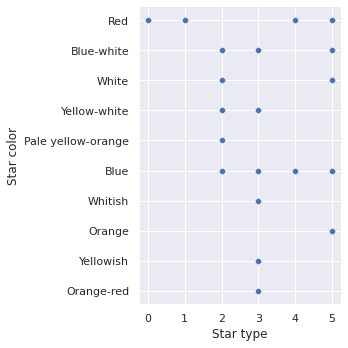

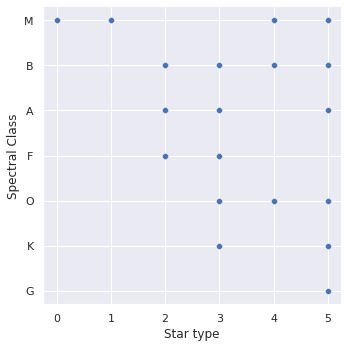

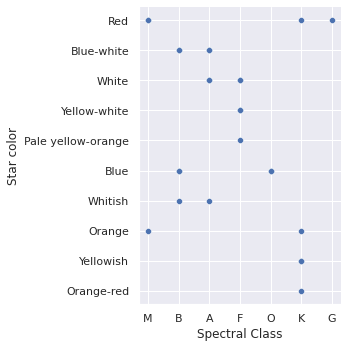

In [10]:
#to make more sense of the previous data, we can use a scatterplot to have a visual representation
sns.relplot(data=df2, x="Star type", y="Star color")
sns.relplot(data=df2, x="Star type", y="Spectral Class")
sns.relplot(data=df2, x="Spectral Class", y="Star color")

### A few trends we notice:
1. Star types 0 and 1 are both Class M and are red in color while the other star types (3 - 5 are more diverse) in those categories. 
2. Overall, there doesn't seem to be a super huge correlation between these three categories to the point where we can deduce the star type given its color and spectral class (with the exception being star types 0 and 1 as we acknowledged before.
##### So let's move onto other attributes that possibly have a better correlation to star type.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

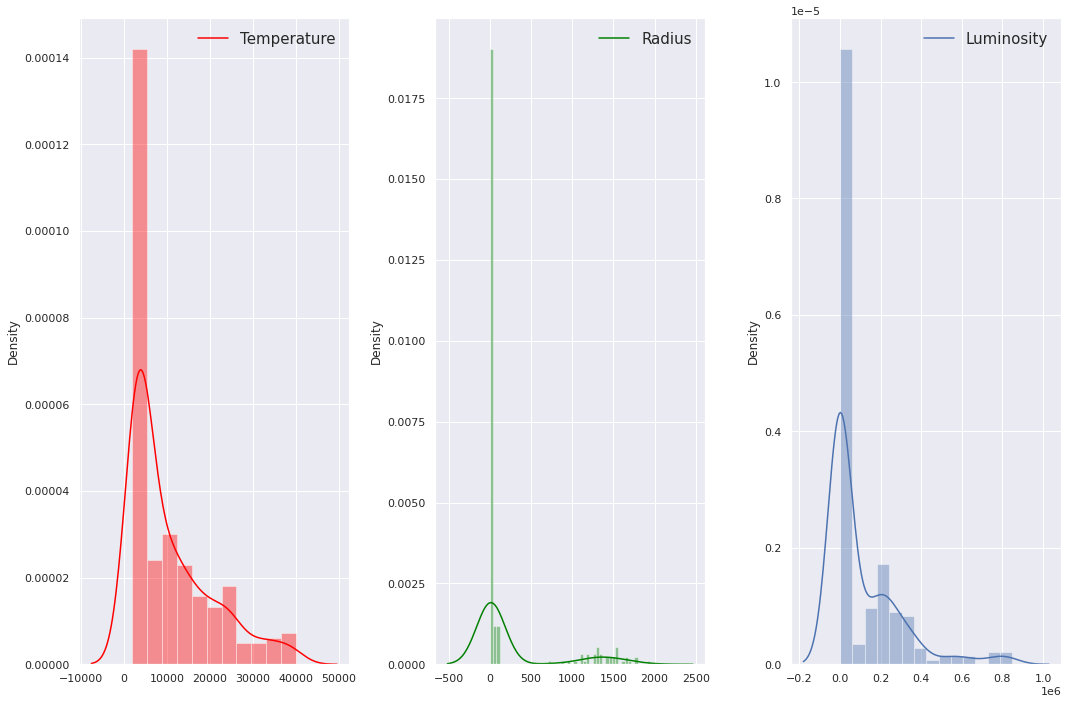

In [11]:
#moving onto numeric data, we can graph a few attributes and look at their frequency/distribution with the help of a distplot
fig, axs = plt.subplots(ncols=3)
plot1 = sns.distplot(df2['Temperature (K)'], ax=axs[0], color='Red')
plot2 = sns.distplot(df2['Radius(R/Ro)'], ax=axs[1], color = 'Green')
plot3 = sns.distplot(df2['Luminosity(L/Lo)'], ax=axs[2])
fig.tight_layout()
plot1.set(xlabel=None)
plot2.set(xlabel=None)
plot3.set(xlabel=None)
sns.set(rc={'figure.figsize':(15,10)})
plot1.legend(labels=["Temperature"], fontsize=15, frameon=False)
plot2.legend(labels=["Radius"], fontsize=15, frameon=False)
plot3.legend(labels=["Luminosity"], fontsize=15, frameon=False)
plt.show()
#notice that all three graphs are skewed right, especially luminosity and temperature 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == "__main__":


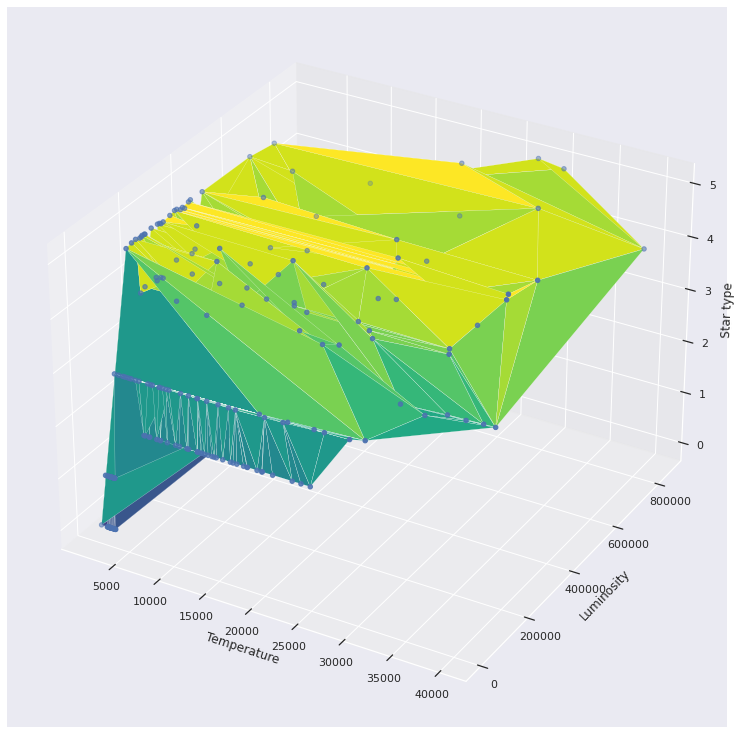

In [12]:
#Since we've noticed a trend with luminosity and temperature, we can graph both of them against star type to see any potential trends again
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

X = df2['Temperature (K)'].values
Y = df2['Luminosity(L/Lo)'].values
Z = df2['Star type'].values
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(X, Y, Z, cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter(X, Y, Z)
ax.set_xlabel('Temperature')
ax.set_ylabel('Luminosity')
ax.set_zlabel('Star type')
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

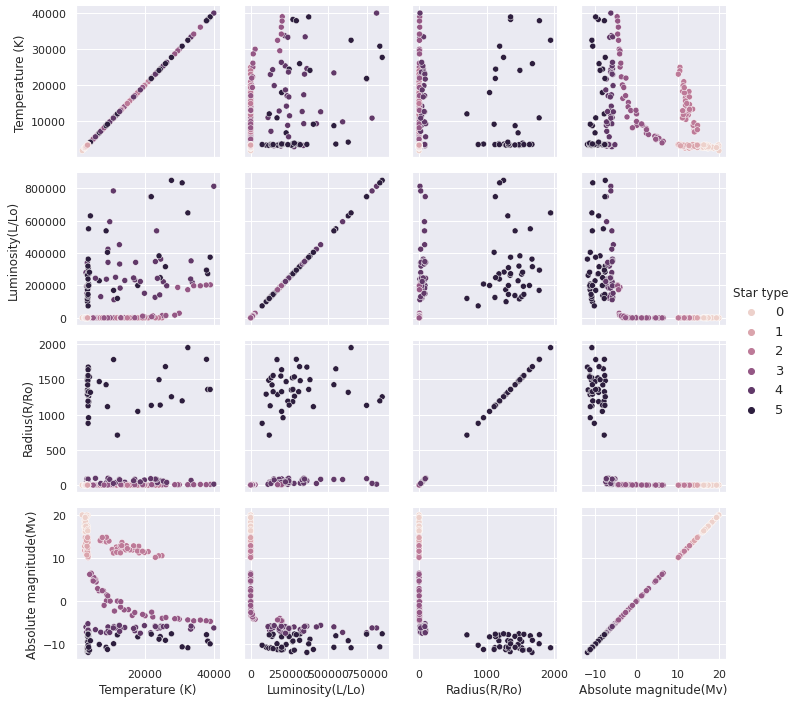

In [13]:
#most columns are numeric so it's easier to see any possible correlation(s) between star type and other attributes 
#with a multiplot grid before analyzing any correlations
variables = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
pairgrid = sns.PairGrid(df2, hue="Star type", vars = variables)
pairgrid.map(sns.scatterplot)
pairgrid.add_legend(fontsize=13)

### From these graphs, we can see that temperature and luminosity are the best predictors (out of all the other attributes have) to predict a star's type. We also see that stars with a greater radius have a higher temperature compared to stars with a smalled radius.

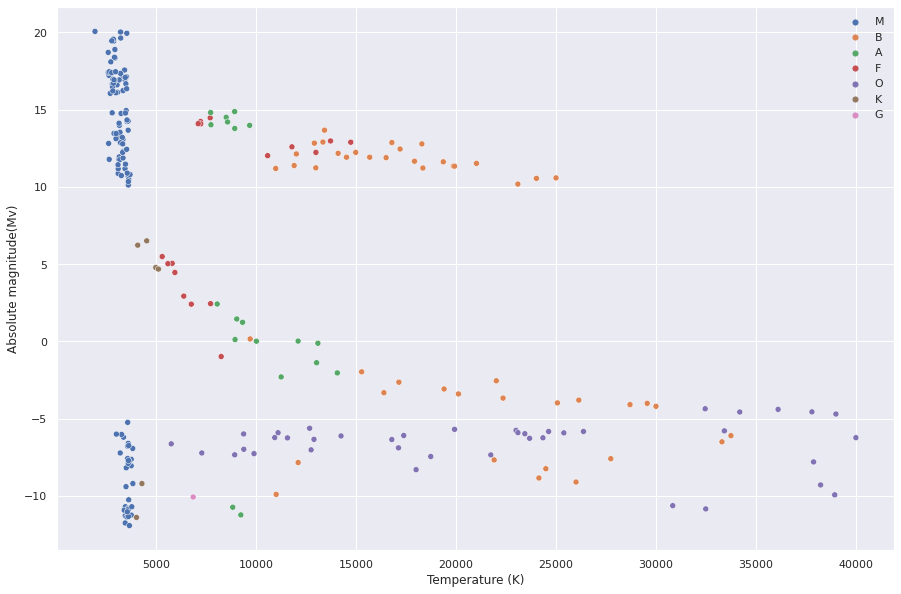

In [14]:
#now we can tackle our main objective: showing that our data fits the Hertzsprung-Russell Diagram
plot = sns.scatterplot(data=df2, x="Temperature (K)", y="Absolute magnitude(Mv)", hue="Spectral Class")
sns.set(rc={'figure.figsize':(10,10)})
plot.legend(markerscale=0.85, frameon=False)

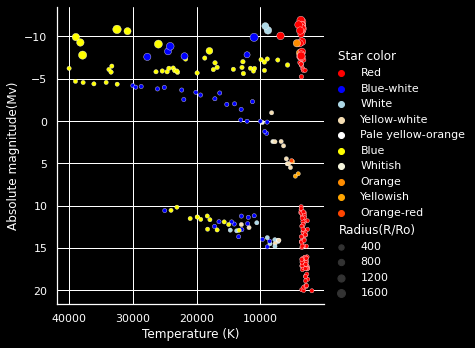

In [15]:
#while we can make inferences from the graph above, it would be easier if we change up our graph to look like the desired graph
from matplotlib.pyplot import figure
plt.style.use('dark_background')
sns.relplot(x='Temperature (K)', y='Absolute magnitude(Mv)', hue='Star color', size='Radius(R/Ro)', data=df2, palette=color)
y = 'Absolute magnitude(Mv)'
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

#notice that the graph we generated below is similar to the HR Diagram!

# Takeaways:
### I became more acquainted with pandas, seaborn, and matplotlib after attempting this coding challenge. It has definitely been a good start for me to further venture into kaggle datasets and to use more advanced visuzlization techniques. While I knew our data was "supposed" to look somewhat similar to the HR Diagram, it was interesting to see how each star's attributes played out in determining it's star type.

### References used:
#### Along with the official documentation for pandas and seaborn, I used Stack Overflow to find answers to my questions.